<a href="https://githubtocolab.com/borislevant/python4ml/blob/main/pandas-seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Pandas and Seaborn: Data Analysis & Visualization


[![Pandas logo](https://pandas.pydata.org/static/img/pandas.svg)](http://pandas.pydata.org/)

__Pandas__ is a very strong library for manipulating large and complex datasets. pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python

The two primary data structures of pandas:
- *Series* is a 1D labeled homogeneously-typed array
- *DataFrame* is a general 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed column

Pandas *DataFrame* structure addresses three deficiencies of NumPy arrays:

- **Strings and Numbers in one table**: *DataFrame* hold heterogenous data; each column can have its own numpy.dtype
- **Columns names & Row indices**: the axes of a data frame are labeled with column names and row indices
- **Missing values**: they account for missing values which this is not directly supported by arrays

*DataFrame* are extremely useful for data manipulation. They provide a large range of operations such as filter, join, and group-by aggregation, as well as plotting.


[![Seaborn logo](https://seaborn.pydata.org/_images/logo-wide-lightbg.svg)](https://seaborn.pydata.org/)

**Seaborn** is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.


## Installation and initialization

Install the *pandas* and *seaborn* modules by the following line of code
```
pip install pandas
pip install seaborn
```

Import the *pandas* and *seaborn* modules by calling
```
import pandas as pd
import seaborn as sns
```

To check the version of the *pandas* and *seaborn*, we will use the following code

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('Pandas version:', pd.__version__)
print('Seaborn version:', sns.__version__)

Pandas version: 1.1.5
Seaborn version: 0.11.2


The *seaborn* package includes a number of usefull datasets. The list of all available datasets can be obtained by calling
```
sns.get_dataset_names()
```
and it's full documentation and descritions could be found here: https://github.com/mwaskom/seaborn-data. All the datasets are loaded as pandas DataFrame objects. We will use the dataset of Life expectancy vs. health expenditure, 1970 to 2020 (https://ourworldindata.org/grapher/life-expectancy-vs-health-expenditure)

The following code loads the data into pandas DataFrame and uses the function *head()* to display the first 5 rows of the table 

In [2]:
df = sns.load_dataset('healthexp')
df.head(5)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


The attribute *shape* provides the information about the size of the object

In [3]:
df.shape

(274, 4)

In this example we see the ability of DataFrame to hold data of different types. To get the first impression of the data, we can use the following call

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


## DataFrame object: accessing the data

In this section we will learn how to access the columns 

![](https://pandas.pydata.org/docs/_images/03_subset_columns.svg)

rows of the DataFrame

![](https://pandas.pydata.org/docs/_images/03_subset_rows.svg)

or individual elements

![](https://pandas.pydata.org/docs/_images/03_subset_columns_rows.svg)


As we observe, there are 4 columns, Year of type integer, Country of the type string and Spending_USD and Life_Expectancy of type float. We also see that there are no "None" values in the table - each column contains 274 non-null values. We can also see the columns names of the DataFrame in the different way as a list of strings:

In [5]:
df.columns

Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')

Each column is a Series object and we can access it in different ways

In [6]:
df.Country.head(3)

0          Germany
1           France
2    Great Britain
Name: Country, dtype: object

In [7]:
df['Country'].shape

(274,)

We can see only the unique countires included in the Series:
    

In [8]:
df['Country'].unique()

array(['Germany', 'France', 'Great Britain', 'Japan', 'USA', 'Canada'],
      dtype=object)

In the same way we can access the multiple columns of the DataFrame. In this case the returned object is DataFrame

In [9]:
df_floats = df[['Spending_USD', 'Life_Expectancy']]
df_floats.head(5)

,Spending_USD,Life_Expectancy
0,252.311,70.6
1,192.143,72.2
2,123.993,71.9
3,150.437,72.0
4,326.961,70.9


Now let's extract the subset of the table: only the data for Japan or USA. Please, note that there are only 102 rows representing those 2 countries

In [10]:
df_japan_usa = df[df.Country.isin(['Japan', 'USA'])]
df_japan_usa = df[(df.Country == 'Japan') | (df.Country == 'USA')]
df_japan_usa.shape

(102, 4)

The condition inside the selection brackets ```df.Country == 'Japan'``` checks for which rows the Country is Japan. The output of the conditional expression (>, but also ==, !=, <, <=,… would work) is actually a pandas Series of boolean values (either True or False) with the same number of rows as the original DataFrame. Such a Series of boolean values can be used to filter the DataFrame by putting it in between the selection brackets []. Only rows for which the value is True will be selected

In [11]:
(df.Country == 'Japan').head(10)

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
8     True
9    False
Name: Country, dtype: bool

Similar to the conditional expression, the isin() conditional function returns a True for each row the values are in the provided list. To filter the rows based on such a function, use the conditional function inside the selection brackets []. In this case, the condition inside the selection brackets df.Country.isin(['Japan', 'USA']) checks for which rows the Country column is either Japan or USA

This is equivalent of using the combination of the boolean statements combined with | (OR)

Now let's check in which country people lived longer than 83 years after the year 2015

In [12]:
df.loc[(df["Year"] > 2015) & (df["Life_Expectancy"]>=83), "Country"]

248    Japan
254    Japan
260    Japan
266    Japan
272    Japan
Name: Country, dtype: object

In this case, a subset of both rows and columns is made in one go and just using selection brackets [] is not sufficient anymore. The loc/iloc operators are required in front of the selection brackets []. When using loc/iloc, the part before the comma is the rows you want, and the part after the comma is the columns you want to select

When using the column names, row labels or a condition expression, use the loc operator in front of the selection brackets []. For both the part before and after the comma, you can use a single label, a list of labels, a slice of labels, a conditional expression or a colon. Using a colon specifies you want to select all rows or columns.

Now let's choose the rows 10 till 15 and columns 2 to 4

In [13]:
df.iloc[9:15, 2:4]

,Spending_USD,Life_Expectancy
9,357.988,71.2
10,337.364,71.0
11,185.390,73.2
12,397.097,71.2
13,384.541,71.3
14,205.778,73.4


## Read and write tabular data

Pandas provides the interface to read and write the data from/to various formats. The most common are CSV (comma-separated-values file), Excel spreadsheets, etc.

![](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)

In the following examples we write the DataFrame 

In [14]:
df.columns

Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')

In [15]:
df.to_excel("healthexp.xlsx", sheet_name="data", index=False)

Whereas read_* functions are used to read data to pandas, the to_* methods are used to store data. The to_excel() method stores the data as an excel file. In the example here, the sheet_name is named passengers instead of the default Sheet1. By setting index=False the row index labels are not saved in the spreadsheet.

In the same way we can read the file

In [16]:
df = pd.read_excel("healthexp.xlsx", sheet_name="data")

## Plots in Pandas with Matplotlib

![](https://pandas.pydata.org/docs/_images/04_plot_overview.svg)

By default the plotting API by Pandas plots all the numerical columns of the DataFrame. In addition to line, we can use all other possible types of the plotting

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

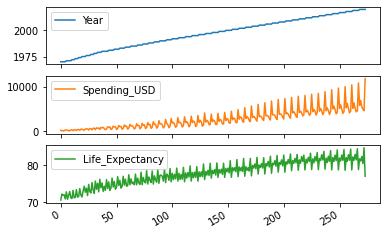

In [17]:
df.plot.line(subplots=True)

If we want to see the dependency between the Spendings and the life expectancy, we can use the scatter plot. We do it for all the countiries and only for Japan

<AxesSubplot:xlabel='Spending_USD', ylabel='Life_Expectancy'>

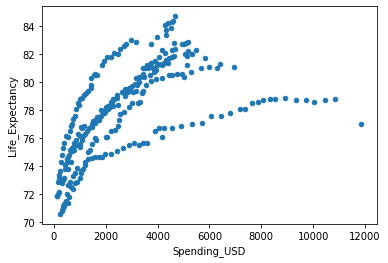

In [18]:
df.plot.scatter(x='Spending_USD', y='Life_Expectancy')

<AxesSubplot:xlabel='Spending_USD', ylabel='Life_Expectancy'>

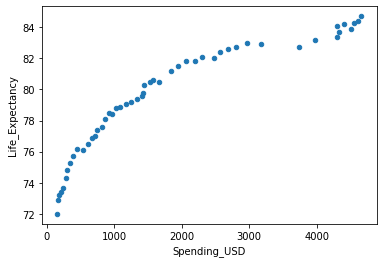

In [19]:
df[df.Country=='Japan'].plot.scatter(x='Spending_USD', y='Life_Expectancy')

We can do much more informative graphs with the Seaborn. First of all, we can plot automatically different graphs per different Countries by using the hue property

<AxesSubplot:xlabel='Spending_USD', ylabel='Life_Expectancy'>

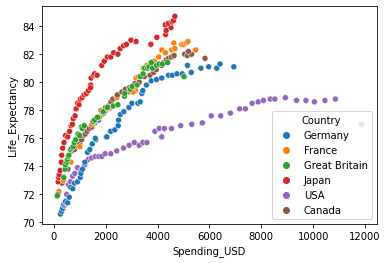

In [25]:
sns.scatterplot(data=df, x='Spending_USD', y='Life_Expectancy', hue='Country')

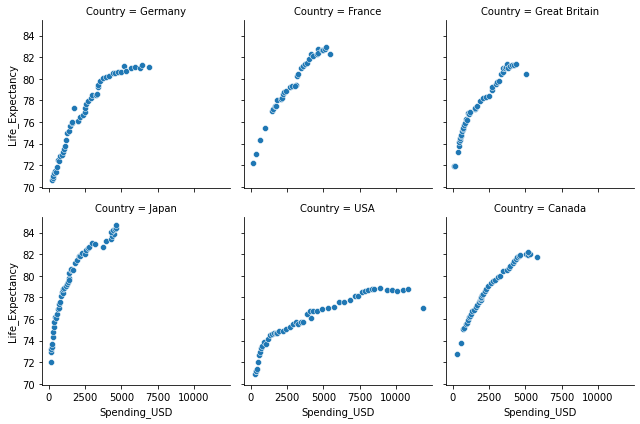

In [24]:
g = sns.FacetGrid(df, col="Country", col_wrap=3)
g.map(sns.scatterplot, 'Spending_USD', 'Life_Expectancy')


# References

- Examples: [Seaborn example gallery](http://seaborn.pydata.org/examples/index.html)
- Slides: [Statistical inference with Python](https://docs.google.com/presentation/d/1imQAEmNg4GB3bCAblauMOOLlAC95-XvkTSKB1_dB3Tg/pub?slide=id.p) by Allen Downey
- Book: [Think Stats](greenteapress.com/thinkstats2/html/index.html) by Allen Downey - statistics with Python. Free Ebook.
- Blog post: [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Tutorial: [An Introduction to Pandas](http://www.synesthesiam.com/posts/an-introduction-to-pandas.html)